# **Classification Problem Example**
For classification exercise we are going to use sklearns iris plant dataset.
Objective is to classify iris flowers among three species (setosa, versicolor or virginica) from measurements of length and width of sepals and petals

***Understanding the IRIS dataset***

iris.DESCR > Complete description of dataset


-iris.data > Data to learn. Each training set is 4 digit array of features.

-Total 150 training sets
-iris.feature_names > Array of all 4 feature ['sepal length (cm)','sepal width cm)','petal length (cm)','petal width (cm)']

-iris.filename > CSV file name

-iris.target > The classification label. For every training set there is one

-classification label(0,1,2). Here 0 for setosa, 1 for versicolor and 2 for virginica

-iris.target_names > the meaning of the features. It's an array >> ['setosa', 'versicolor', 'virginica']

-From above details its clear that X = 'iris.data' and y= 'iris.target'

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()

# Display the available attributes and methods of the dataset
print('Dataset structure= ', dir(iris))

# Create a Pandas DataFrame from iris data
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Assign feature names as column names

# Add the target column (0, 1, 2) representing species
df['target'] = iris.target

# Convert numerical target values into actual species names
df['flower_species'] = df.target.apply(lambda x: iris.target_names[x])
# Each value in 'target' is used as an index to get the corresponding species name from 'target_names'

# Display unique target values (should be [0, 1, 2])
print('Unique target values=', df['target'].unique())

# Show 5 random rows from the dataset to inspect the structure
df.sample(5)

Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
87,6.3,2.3,4.4,1.3,1,versicolor
148,6.2,3.4,5.4,2.3,2,virginica
86,6.7,3.1,4.7,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
20,5.4,3.4,1.7,0.2,0,setosa


In [ ]:
#Build Machine Learning Model
#Lets create feature matrix X  and y labels
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['target']]

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (150, 4)
y shape= (150, 1)


In [ ]:
'''Create Test And Train Dataset
We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model
We will keep 20% of data for testing and 80% of data for training the model
If you want to learn more about it, please refer Train Test Split tutorial'''

X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (120, 4)
X_test dimension=  (30, 4)
y_train dimension=  (120, 1)
y_train dimension=  (30, 1)


In [ ]:
#Now lets train the model using Decision Tree
"""
To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
Also note that default value of criteria to split the data is 'gini'
"""
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Testing the Model using test data

# Reshape the input properly and maintain column names

print('Actual value of species for 10th test example=', iris.target_names[y_test.iloc[10]])
print('Predicted value of species for 10th test example=',
      iris.target_names[cls.predict(pd.DataFrame([X_test.iloc[10]], columns=X_test.columns))[0]])

print('\nActual value of species for 20th test example=', iris.target_names[y_test.iloc[20]])
print('Predicted value of species for 20th test example=',
      iris.target_names[cls.predict(pd.DataFrame([X_test.iloc[20]], columns=X_test.columns))[0]])

print('\nActual value of species for 25th test example=', iris.target_names[y_test.iloc[25]])
print('Predicted value of species for 25th test example=',
      iris.target_names[cls.predict(pd.DataFrame([X_test.iloc[25]], columns=X_test.columns))[0]])


Actual value of species for 10th test example= ['versicolor']
Predicted value of species for 10th test example= versicolor

Actual value of species for 20th test example= ['versicolor']
Predicted value of species for 20th test example= versicolor

Actual value of species for 25th test example= ['versicolor']
Predicted value of species for 25th test example= versicolor


In [ ]:
cls.score(X_test, y_test)

0.9666666666666667

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 T

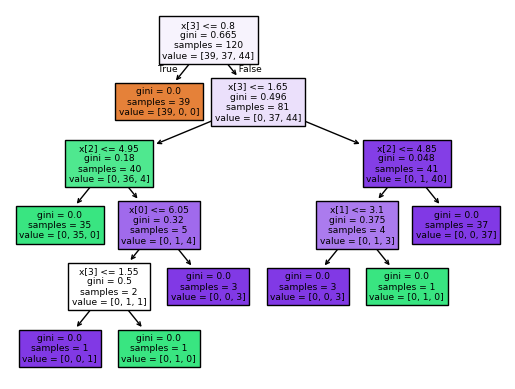

In [ ]:
tree.plot_tree(cls,filled=True)

# **Regression Problem Example**

For this regression exercise, we are using sklearn's California Housing Prices dataset.The objective is to predict house prices based on the available features.

***Understanding the dataset***

Samples: 20,640

Features (X):

- MedInc → Median income ($10,000s)

- HouseAge → Median house age

- AveRooms → Avg. rooms per household

- AveBedrms → Avg. bedrooms per household

- Population → Block group population

- AveOccup → Avg. household occupancy

- Latitude → Location latitude

- Longitude → Location longitude

Target (y): Median house value ($100,000s)

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets, model_selection, tree
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the California Housing dataset
california = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = california.target

# Display dataset structure
print("Dataset structure:", dir(california))

Dataset structure: ['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [ ]:
# View a sample of the dataset
print(df.sample(5))

# Define feature matrix (X) and target variable (y)
X = df[california.feature_names]
y = df[['target']]

print('X shape=', X.shape)
print('y shape=', y.shape)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
17064  2.2746      24.0  2.936121   1.099884      2437.0  2.830430     37.49   
4599   1.3169      47.0  2.153094   1.169381      1406.0  4.579805     34.05   
14621  2.3658      17.0  4.073093   1.113347      3102.0  3.286017     32.78   
8302   3.9352      44.0  4.603636   1.129091       961.0  1.747273     33.76   
19997  2.3882      21.0  5.625767   1.231084      1496.0  3.059305     36.16   

       Longitude  target  
17064    -122.21   2.250  
4599     -118.27   1.125  
14621    -117.17   1.641  
8302     -118.13   4.069  
19997    -119.35   0.492  
X shape= (20640, 8)
y shape= (20640, 1)


In [ ]:
# Split dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Display dimensions of train and test sets
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)


X_train dimension=  (16512, 8)
X_test dimension=  (4128, 8)
y_train dimension=  (16512, 1)
y_test dimension=  (4128, 1)


In [ ]:
# Initialize Decision Tree Regressor
dtr = tree.DecisionTreeRegressor(max_depth=3, random_state=1)

# Train the model
dtr.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=1)

In [ ]:
# Predict house prices
predicted_price = pd.DataFrame(dtr.predict(X_test), columns=['Predicted Price'])
actual_price = pd.DataFrame(y_test, columns=['target']).reset_index(drop=True)

# Create a DataFrame comparing actual vs predicted values
df_actual_vs_predicted = pd.concat([actual_price, predicted_price], axis=1)
print(df_actual_vs_predicted.T)

                     0         1        2         3         4         5     \
target           3.550000  0.707000  2.29400  1.125000  2.254000  2.630000   
Predicted Price  2.837946  1.283949  1.90481  1.283949  3.468021  3.770162   

                     6         7        8        9     ...      4118  \
target           2.268000  1.662000  1.18000  1.56300  ...  3.155000   
Predicted Price  3.468021  1.283949  1.90481  1.90481  ...  3.468021   

                     4119      4120     4121      4122      4123      4124  \
target           1.957000  1.717000  2.29600  1.327000  0.682000  2.250000   
Predicted Price  2.837946  1.933816  1.90481  1.283949  1.283949  1.933816   

                    4125     4126      4127  
target           3.50000  2.27300  1.417000  
Predicted Price  1.90481  1.90481  1.283949  

[2 rows x 4128 columns]


In [ ]:
# Evaluate model performance using R² score
print("Model R² Score:", dtr.score(X_test, y_test))

Model R² Score: 0.5213660194943673


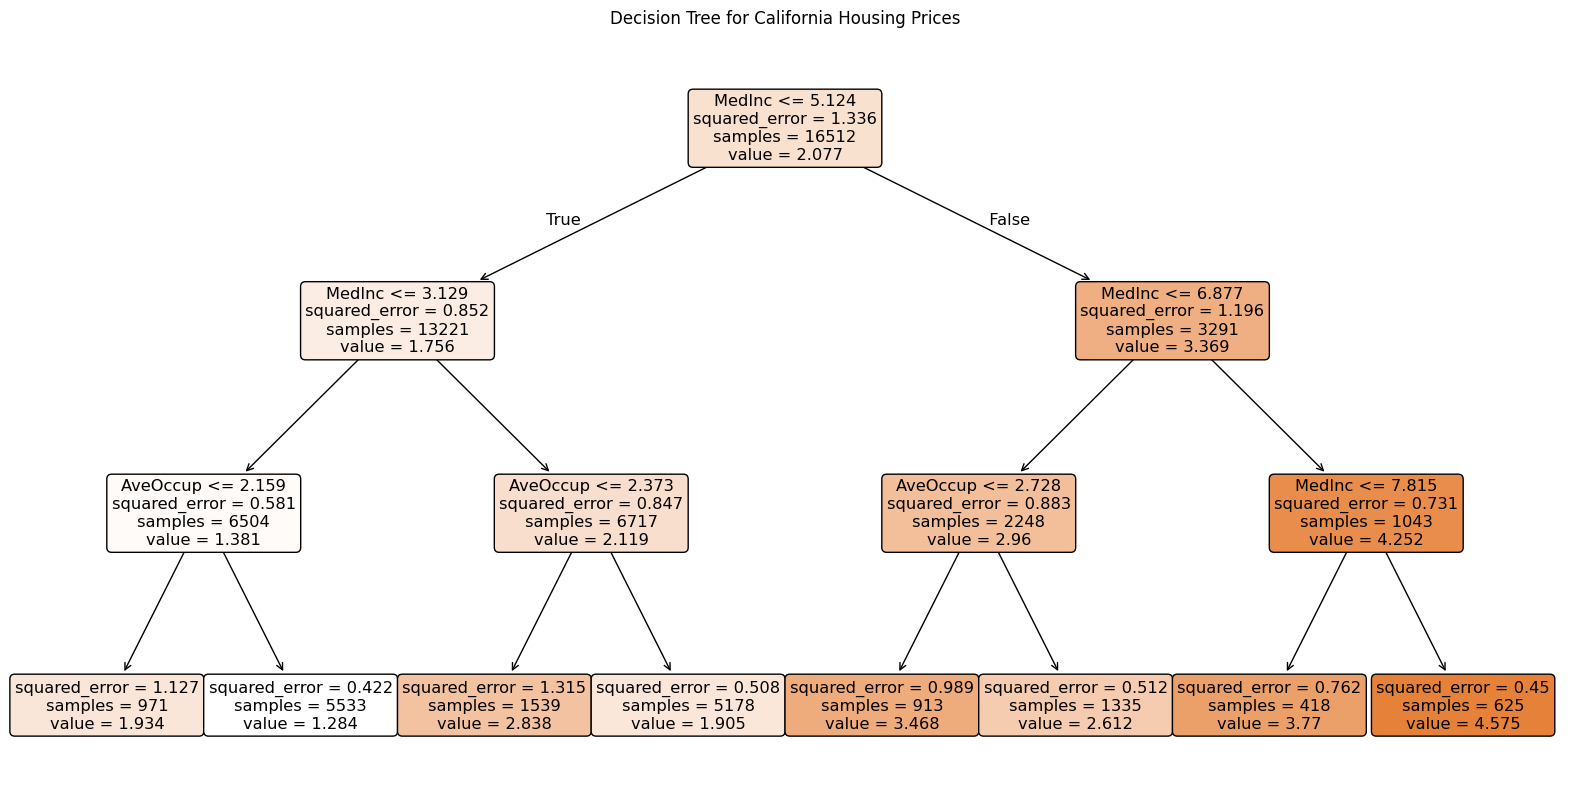

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtr, filled=True, feature_names=california.feature_names, rounded=True)
plt.title("Decision Tree for California Housing Prices")
plt.show()